# Pandas 시각화
판다시 자체적으로 matplotlib 를 기반으로 한 시각화기능을 지원.    
Series나 DataFrame에 plot() 함수나 plot accessor를 사용한
- https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
wb = pd.read_excel('data/webbrowser_share.xls', index_col=0, converters={'date':np.str})
wb

,Chrome,Edge,IE,Whale Browser,Safari,Firefox,Opera,Edge Legacy,360 Safe Browser,Pale Moon,Sogou Explorer,QQ Browser,Swing,Yandex Browser,Mozilla,Maxthon,Coc Coc
date,,,,,,,,,,,,,,,,,
2021.06,70.43,12.84,5.85,5.45,2.46,1.72,0.59,0.22,0.21,0.00,0.05,0.04,0.03,0.03,0.02,0.02,0.02
2021.07,69.90,13.71,5.56,5.23,2.42,1.84,0.71,0.19,0.18,0.00,0.04,0.03,0.03,0.07,0.02,0.02,0.02
2021.08,69.34,14.46,5.27,5.46,2.54,1.75,0.62,0.16,0.15,0.00,0.04,0.02,0.03,0.05,0.04,0.03,0.02
2021.09,69.92,14.57,4.53,5.52,2.50,1.74,0.69,0.17,0.13,0.00,0.03,0.02,0.03,0.05,0.03,0.02,0.02
2021.10,70.49,14.78,3.42,5.87,2.51,1.82,0.62,0.13,0.12,0.00,0.03,0.02,0.03,0.05,0.04,0.02,0.02
2021.11,70.57,14.88,3.17,5.90,2.57,1.77,0.64,0.11,0.14,0.00,0.03,0.04,0.02,0.04,0.04,0.01,0.02
2021.12,70.89,14.90,2.86,5.99,2.53,1.79,0.59,0.10,0.12,0.00,0.03,0.05,0.02,0.04,0.04,0.01,0.02
2022.01,71.09,15.18,2.58,5.79,2.55,1.86,0.58,0.09,0.09,0.00,0.02,0.02,0.01,0.03,0.04,0.01,0.03
2022.02,71.02,15.72,1.90,5.73,2.66,2.07,0.59,0.10,0.04,0.00,0.01,0.01,0.01,0.02,0.06,0.01,0.02


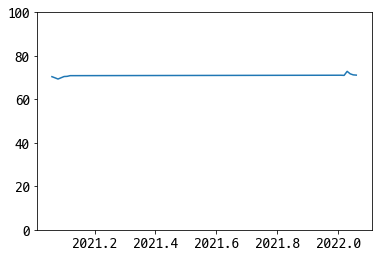

In [3]:
# chrome browser의 점유율변화 - 그래프
plt.plot(wb.index, wb['Chrome'])
plt.ylim(0, 100)
plt.show()

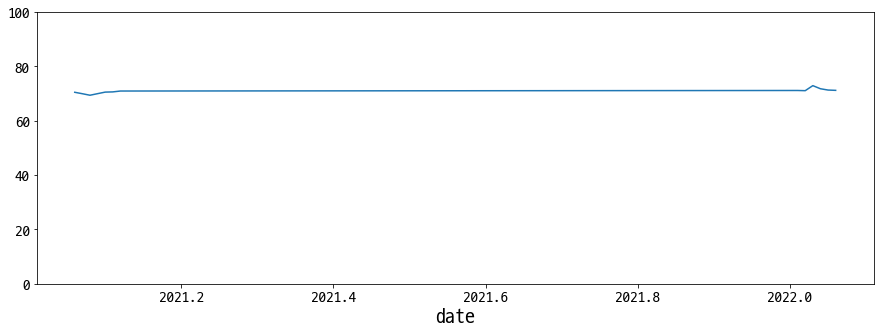

In [4]:
# index : 연/월, value : 점유율 값
plt.figure(figsize=(15,5))
wb['Chrome'].plot()
plt.ylim(0, 100)
plt.show()

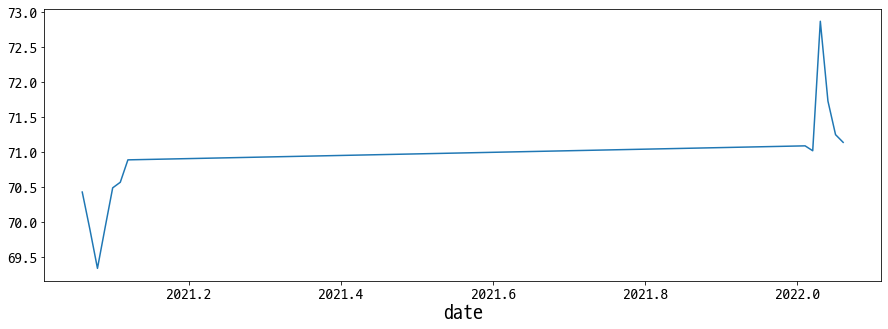

In [5]:
plt.figure(figsize=(15,5))
wb['Chrome'].plot.line()
plt.show()

## plot()
- Series/DataFram.plot(kind='종류')
- Series/DataFram.plot.그래프함수()
- kind 지정한 값에 따라 다양한 그래프를 생성 가능
- kind 그래프 종류 지정
    - 'line' : line plot (default)
    - 'bar' : vertical bar plot
    - 'barh' : horizontal bar plot
    - 'hist' : histogram
    - 'box' : boxplot
    - 'kde' : Kernel Density Estimation plot
    - 'pie' : pie plot
    - 'scatter' : scatter plot

- pd.date_range()
    - 일정한 간격으로 증감하는 특정 범위의 날짜를 가지는 index(DateTimeIndex)을 생성
        - 시계열 데이터의 행 index를 날짜시간으로 생성 시 사용

In [6]:
# freq= : 증감간격 (D : 일별, M : 달별, Y : 연별), 해당기준의 마지막 일시(뒤에 S를 붙일 시 해당기준의 시작일시), 문자열 앞 숫자를 붙일 경우 기간 만큼 증감
# periods= : 개수
pd.date_range('2022-01-01', freq='2MS', periods=5)

DatetimeIndex(['2022-01-01', '2022-03-01', '2022-05-01', '2022-07-01',
               '2022-09-01'],
              dtype='datetime64[ns]', freq='2MS')

In [7]:
# 평균 : 5, 표준편차 : 3인 정규분포를 따르는 난수 생성
# size : shape 형태
value = np.random.normal(5, 3, size=(10,3))
index = pd.date_range('2022-06-01', freq='D', periods=10)
df = pd.DataFrame(value, index=index, columns={'No.1', 'No.2', 'No.3'})

# index명이 연속된 일시(DatatimeIndex)의 DataFrame => 시게열 데이터(일시 변화에 따른 어쩐 변화를 가지는 데이터셋)
df

,No.2,No.1,No.3
2022-06-01,3.675276,4.005611,8.785940
2022-06-02,3.324722,-0.649872,2.195179
2022-06-03,5.382011,3.321812,3.034609
2022-06-04,3.284196,9.301500,7.477860
2022-06-05,4.628134,-2.635282,-1.200133
2022-06-06,8.628203,6.143898,7.735114
2022-06-07,5.610955,9.029169,12.777979
2022-06-08,4.801904,10.655258,8.157580
2022-06-09,4.635681,5.169957,6.029207
2022-06-10,5.203426,10.465762,5.601756


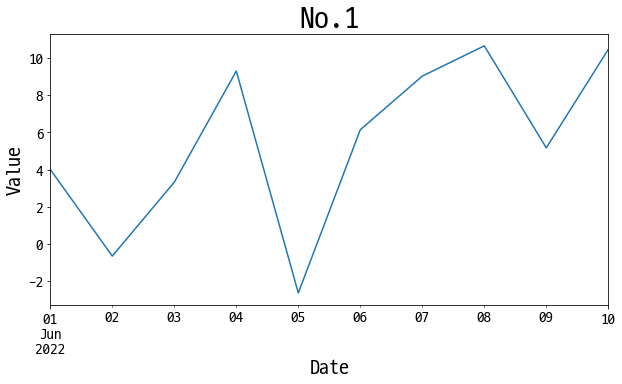

In [8]:
# plot(): 선그래프(deault)
df['No.1'].plot(figsize=(10,5), title='No.1', ylabel='Value', xlabel='Date')
plt.show()

matplotlib를 이용해 여러 설정들 가능

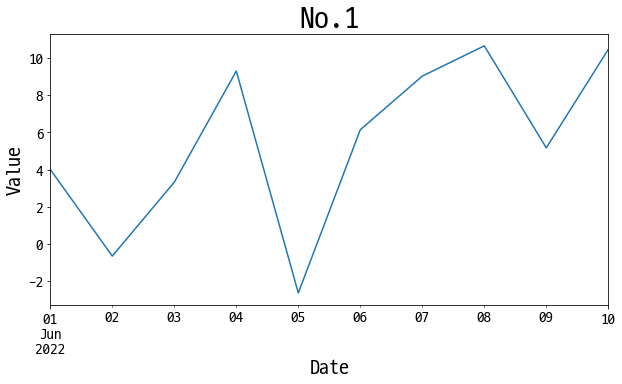

In [9]:
plt.figure(figsize=(10,5))
plt.title('No.1')
plt.xlabel('Date')
plt.ylabel('Value')
df['No.1'].plot()
plt.show()

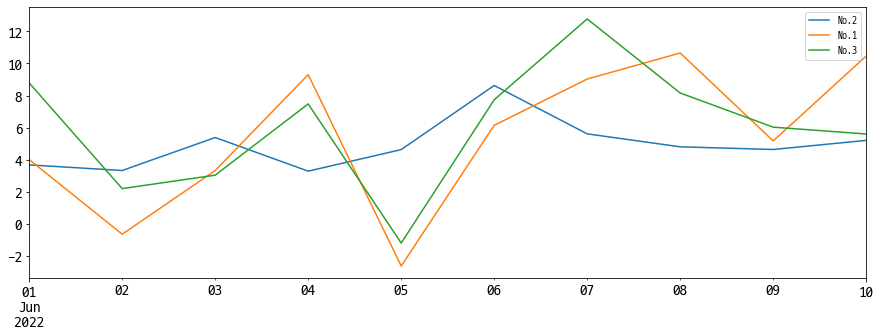

In [10]:
# 다수의 컬럼의 값들을 하나의 axes에 생성
# DataFrame.plot
df.plot(figsize=(15,5))
plt.show()

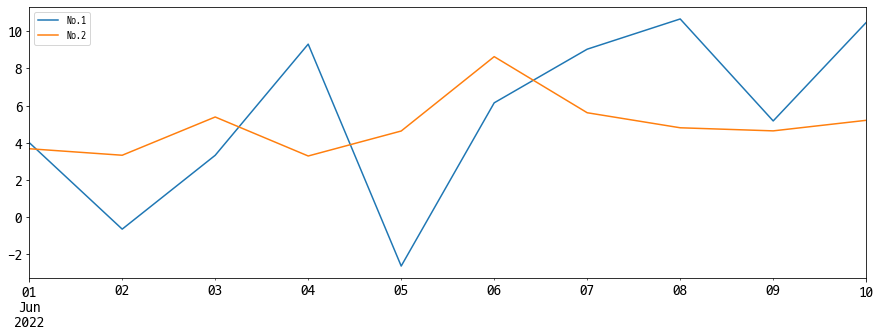

In [11]:
# 특정 컬럼들의 값들을 하나의 axes에 생성
df[['No.1', 'No.2']].plot(figsize=(15,5))
plt.show()

## 막대 그래프
- index가 무슨 값인지를 가리키는 축으로 사용

In [12]:
tips = pd.read_csv('data/tips.csv')
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


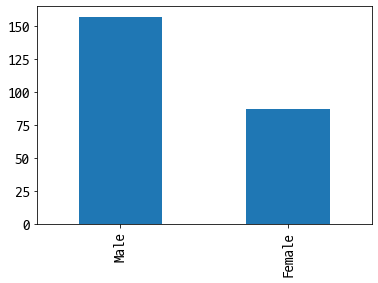

In [13]:
# 성별 인원
tips['sex'].value_counts().plot(kind='bar') # 또는 tips['sex'].value_counts().plot.bar()
plt.show()

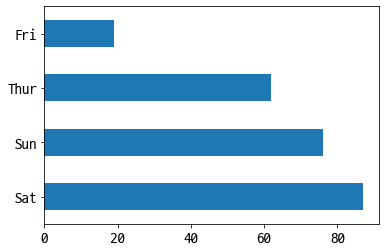

In [14]:
# 요일의 개수를 수평막대그래프 : default로 y축 기준 내림차순으로 생성
tips['day'].value_counts().plot.barh() # 또는 tips['day'].value_counts().plot(kind='barh')
plt.show()

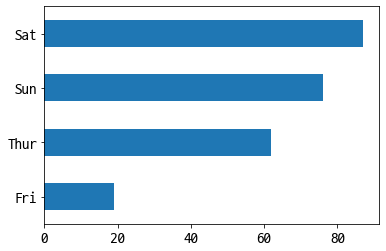

In [15]:
# y축 기준 오름차순 정렬 시
tips['day'].value_counts().sort_values().plot.barh()
plt.show()

- 두개의 분류 별로 그리기
    - 여러개의 컬럼일 경우 수평 누적 막대그래프를 생성

In [16]:
# 요일, 성별 인원수 합계 막대그래프
# pivot table로 정렬
r = tips.pivot_table(index='day', columns='sex', values='size', aggfunc='sum')

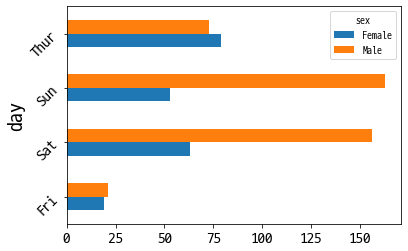

In [17]:
# pivot table로 그래프생성
r.plot.barh(rot=45) # rot= index 각도
plt.show()

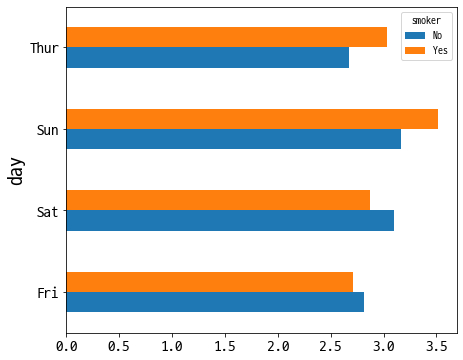

In [18]:
# 요일, 흡연여부의 팁의 평균
tips.pivot_table(index='day', columns='smoker', values='tip', aggfunc='mean').plot(kind='barh', figsize=(7,6))
plt.show()

## 파이차트

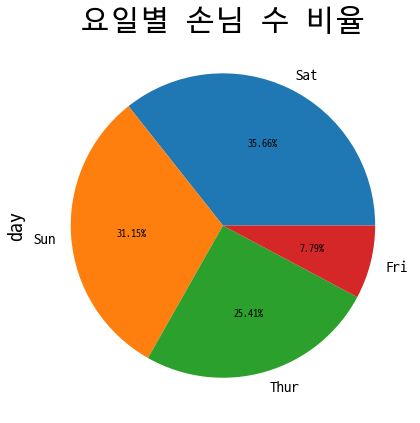

In [19]:
tips['day'].value_counts().plot(kind='pie', figsize=(7,7), autopct='%.2f%%', title='요일별 손님 수 비율')
plt.show()

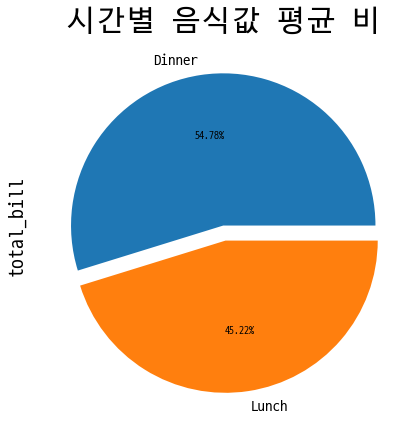

In [20]:
tips.groupby('time')['total_bill'].mean().plot(kind='pie', figsize=(7,7), autopct='%.2f%%', explode=[0, 0.1])
plt.title('시간별 음식값 평균 비')
plt.show()

## 히스토그램, KDE(밀도그래프)
-KDE : 히스토그램을 부드러운 곡선형태로 생성한 그래프(커널밀도 함수를 이용 계산란 결과를 그래프로 생성)

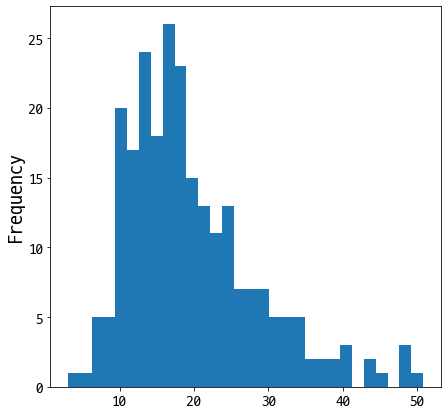

In [21]:
# 히스토그램
tips['total_bill'].plot(kind='hist', bins=30, figsize=(7,7))
plt.show()

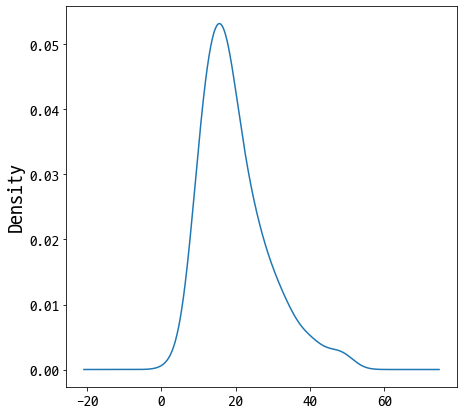

In [22]:
# kde
tips['total_bill'].plot(kind='kde', figsize=(7,7))
plt.show()

## Boxplot (상자그래프)

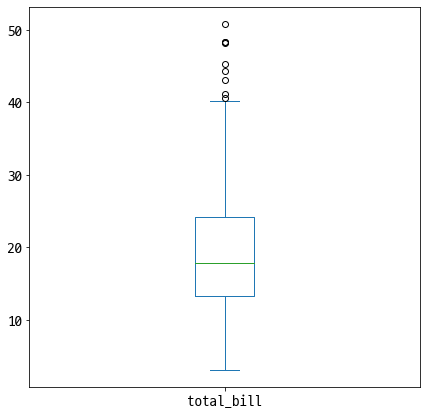

In [23]:
tips['total_bill'].plot(kind='box', figsize=(7,7))
plt.show()

#### 극단치 : 정상범위를 넘어선 값, 이상치(outliner 오류값)
- boxplot에서 극단치 계산법
    1. IQR(Inter Quantile Range) 계산
        - 3분위값 - 1분위값(중간 50% - 25%~75%의 크기)
    1. 정상범위 이하의 극단치
        - [1분위값 - IQR * 1.5] 보다 작은 값
    1. 정상범위 이상의 극단치
        - [3분위값 + IQR * 1.5] 보다 큰 값
- 1.5 : whis 값,  조절 가능
    - 정상범위를 늘이고 싶은 경우 : 1.5보다 크게 설정
    - 정상범위를 줄이고 싶은 경우 : 1.5보다 작게 설정

In [24]:
quantile = tips['total_bill'].quantile(q=[0.25, 0.5, 0.75])
IQR = quantile[0.75] - quantile[0.25]
whis = 1.5
o1 = quantile[0.25] - IQR * whis
o3 = quantile[0.75] + IQR * whis
print('IQR :', IQR)
print(f'정상범위: {o1} ~ {o3}')
tips['total_bill'][(tips['total_bill'] < o1) | (tips['total_bill'] > o3)]

IQR : 10.779999999999998
정상범위: -2.8224999999999945 ~ 40.29749999999999


59     48.27
102    44.30
142    41.19
156    48.17
170    50.81
182    45.35
184    40.55
197    43.11
212    48.33
Name: total_bill, dtype: float64

In [25]:
tips['total_bill'].agg(['min', 'max'])

min     3.07
max    50.81
Name: total_bill, dtype: float64

### 하나의 figure에 다수의 axes 생성

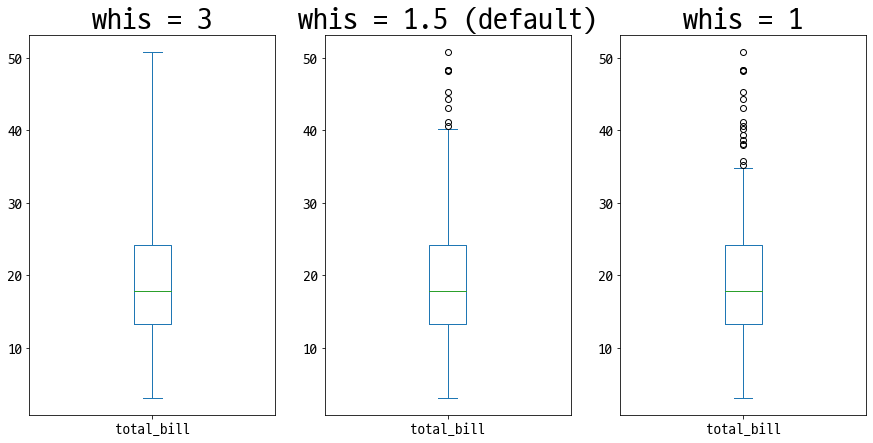

In [26]:
# whis 변화에 따른 이상치변화
fig = plt.figure(figsize=(15,7))
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)

tips['total_bill'].plot(kind='box', whis=3, title='whis = 3', ax=ax1) # 또는 tips['total_bill'].plot.box(whis=3, title='whis = 3', ax=ax1)
tips['total_bill'].plot(kind='box', title='whis = 1.5 (default)', ax=ax2) # ax2에 생성
tips['total_bill'].plot(kind='box', whis=1, title='whis = 1', ax=ax3)

plt.show()

### 한 axes에 다수의 boxplot생성

#### 단순 컬럼들 시각화

<AxesSubplot:>

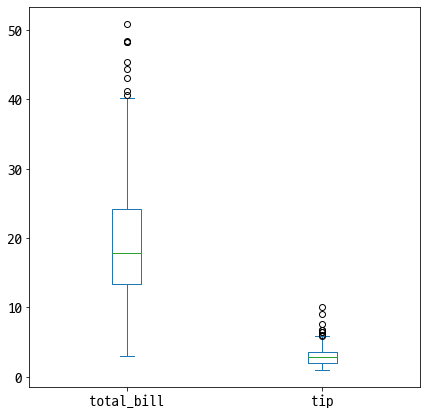

In [27]:
# totalbil과 tip의 boxplot
tips[['total_bill', 'tip']].plot(kind='box', figsize=(7,7))

#### 컬럼 grouping을 통한 시각화

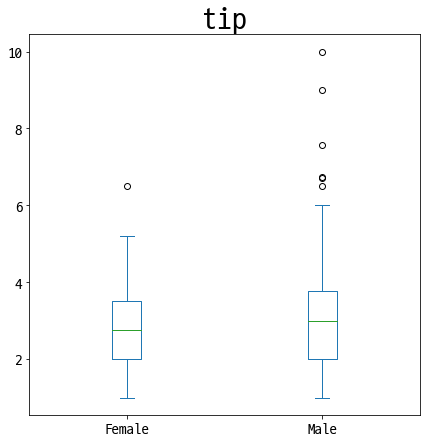

In [28]:
# sex별 tip의 boxplot
tips.plot(kind='box', column=['tip'], by='sex', figsize=(7,7))
plt.show()

## scatter plot (산점도) 

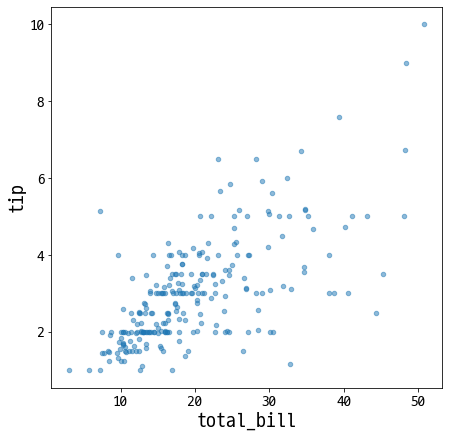

In [29]:
# total_bill과 tip의 상관관계 시각화
tips.plot(kind='scatter', x='total_bill', y='tip', figsize=(7,7), alpha=0.5)
plt.show()